# Project: TMDB Investigation
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about **10,000 movies** collected from The Movie Database (TMDb), including user ratings and revenue.

- Certain columns, like `cast` and `genres`, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the `cast` column. I will leave them as is.
- The final two columns ending with `adj` show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

**Data's content:**
- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- id - This is infact the movie_id as in the first dataset.
- keywords - The keywords or tags related to the movie.
- original_language - The language in which the movie was made.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- status - "Released" or "Rumored".
- tagline - Movie's tagline.
- title - Title of the movie.
- vote_average - average ratings the movie recieved.
- vote_count - the count of votes recieved.

**Questions that I plan on exploring:**
- Biggest budget Vs samllest budget.
- Biggest revenue Vs samllest revenue.
- Biggest profit Vs samllest profit.
- Biggest runtime Vs samllest runtime.
- Biggest vote_count Vs samllest vote_count.
<br>-----------------------------------------------------------------------------------------------------------</br>

- top 10 rated movies
> - less than 1.5 hour.
> - less than 1.5 hour
> - less than 1.5 hour
> - less than 1.5 hour

<br>-----------------------------------------------------------------------------------------------------------</br>
- Which genres are most popular from year to year?
<br>-----------------------------------------------------------------------------------------------------------</br>
- How the profit look over the years?

In [1]:
# importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set matplotlib style
plt.style.use('ggplot')
plt.style.use('tableau-colorblind10')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# loading the data
df = pd.read_csv('tmdb-movies.csv')

# inspect the first 3 row of the data
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

the datafram contains 10,866 rows and 21 columns. 

there is 9 columns contain null values. we need to fix this later.

In [4]:
# check how many duplicated rows for each column
df.duplicated().sum()

1

there is only one duplicated row.

In [5]:
def highlight_zeros(s):
    '''
    highlight the zero in a Series yellow.
    '''
    is_max = s == 0
    return ['background-color: yellow' if v else '' for v in is_max]

In [6]:
# inspect descriptive statistics for the numerical columns
df.describe().style.apply(highlight_zeros)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,14625701.094147,39823319.793392,102.070863,217.389748,5.974922,2001.322658,17551039.822887,51364363.253251
std,92130.136561,1.000185,30913213.831436,117003486.582089,31.381405,575.619058,0.935142,12.812941,34306155.722843,144632485.039973
min,5.000000,0.000065,0.000000,0.000000,0.000000,10.000000,1.500000,1960.000000,0.000000,0.000000
25%,10596.250000,0.207583,0.000000,0.000000,90.000000,17.000000,5.400000,1995.000000,0.000000,0.000000
50%,20669.000000,0.383856,0.000000,0.000000,99.000000,38.000000,6.000000,2006.000000,0.000000,0.000000
75%,75610.000000,0.713817,15000000.000000,24000000.000000,111.000000,145.750000,6.600000,2011.000000,20853251.084404,33697095.717312
max,417859.000000,32.985763,425000000.000000,2781505847.000000,900.000000,9767.000000,9.200000,2015.000000,425000000.000000,2827123750.411890


`budget`, `revenue`, `runtime`, `budget_adj` and `revenue_adj` has a minimum value equal zero, this can't be right.
We need to fix this.

### Data Cleaning 
- drop unnecessary columns.
- remove duplicates.
- Convert `release_date` column to `Date` datatype.
- Convert `budget_adj` & `revenue_adj` to `int`.
- fix columns that have minimum values = 0.
- impute null rows.
- Create `profit` column.

In [7]:
# drop useless columns for our investigation
df.drop(columns=['id', 'imdb_id', 'cast', 'popularity', 'budget', 'revenue', 'homepage',
                 'director', 'tagline', 'keywords', 'production_companies'], inplace=True)

In [8]:
# remove duplicates.
df.drop_duplicates(keep='first', inplace=True)

In [9]:
# Convert release_date column to Date datatype
df.release_date = pd.to_datetime(df.release_date)

In [10]:
# Convert budget_adj & revenue_adj to int
df[['budget_adj', 'revenue_adj']] = df[['budget_adj', 'revenue_adj']].applymap(np.int64)

In [11]:
# fix columns that have minimum values = 0.
df.replace(0, np.nan, inplace=True)

In [12]:
# drop rows that contain null values.
df.dropna(axis=0, inplace=True)

In [13]:
# Create profit column.
df['profit_adj'] = df.revenue_adj - df.budget_adj

In [14]:
# Check the new shape of the data after cleaning it.
df.shape

(3853, 11)

Now we have 3835 movies with 11 features, ready to be explored.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (biggest Vs smallest)
- Biggest budget Vs samllest budget.
- Biggest revenue Vs samllest revenue.
- Biggest profit Vs samllest profit.
- Biggest runtime Vs samllest runtime.
- Biggest vote_count Vs samllest vote_count.

In [15]:
# Create a functions for multiple usage
def biggest_smallest(col, styler=False):
    big = df.nlargest(1, col).T.squeeze()
    small = df.nsmallest(1, col).T.squeeze()
    
    if styler:
        return pd.concat([big, small], axis=1).style.apply(lambda x: 
                                           ['background: lightgreen' if (x.name == '{}'.format(col)) else '' for i in x],
                                                       axis=1)
    else:
        return pd.concat([big, small], axis=1)

    
    
def plot_feature(col):
    '''
    plot the results of biggest_smallest function.
    '''
    biggest_smallest(col).T[col].plot(kind='bar')
    plt.xlabel('Movie number')
    plt.ylabel('{}'.format(col.capitalize()))
    plt.title('Biggest Vs samllest.')
    return plt.show()

In [16]:
# Biggest budget Vs samllest budget.
biggest_smallest('budget_adj', styler=True)

,2244,2618
original_title,The Warrior's Way,Lost & Found
overview,"An Asian assassin (Dong-gun Jang) is forced to hide in a small town in the American Badlands. Also starring Kate Bosworth, Danny Huston, Tony Cox and Academy Award winner Geoffrey Rush.","A comedy about finding your true love at any price. Dylan Ramsey resorts to snatching his beautiful neighbor's dog so he can spend time with her while they go on a phantom dog hunt. Succeeding in his plan, Dylan goes to return the pooch, only to discover that it has hidden Dylan's best friend's diamond ring. Written by WARNER BROS."
runtime,100.000000,95.000000
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
vote_count,74,14
vote_average,6.400000,4.800000
release_year,2010,1999
budget_adj,425000000.000000,1.000000
revenue_adj,11087569.000000,130.000000


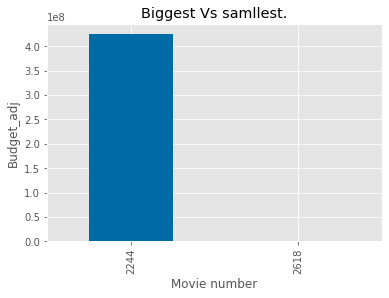

In [17]:
plot_feature('budget_adj')

In [18]:
# Biggest revenue Vs samllest revenue.
biggest_smallest('revenue_adj', styler=True)

,1386,5067
original_title,Avatar,Shattered Glass
overview,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.","Fact-based 2003 drama about the young journalist Stephen Glass, who got a job at The New Republic in 1995 and for three years fabricated at least half of the stories he wrote."
runtime,162.000000,94.000000
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
vote_count,8458,46
vote_average,7.100000,6.400000
release_year,2009,2003
budget_adj,240886902.000000,7112115.000000
revenue_adj,2827123750.000000,2.000000


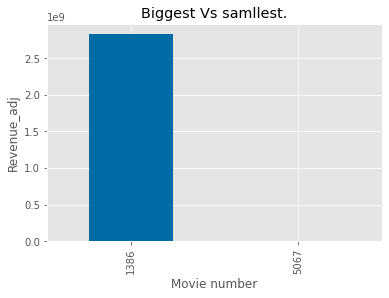

In [19]:
plot_feature('revenue_adj')

In [20]:
# Biggest profit Vs samllest profit.
biggest_smallest('profit_adj', styler=True)

,1329,2244
original_title,Star Wars,The Warrior's Way
overview,Princess Leia is captured and held hostage by the evil Imperial forces in their effort to take over the galactic Empire. Venturesome Luke Skywalker and dashing captain Han Solo team together with the loveable robot duo R2-D2 and C-3PO to rescue the beautiful princess and restore peace and justice in the Empire.,"An Asian assassin (Dong-gun Jang) is forced to hide in a small town in the American Badlands. Also starring Kate Bosworth, Danny Huston, Tony Cox and Academy Award winner Geoffrey Rush."
runtime,121.000000,100.000000
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
vote_count,4428,74
vote_average,7.900000,6.400000
release_year,1977,2010
budget_adj,39575591.000000,425000000.000000
revenue_adj,2789712242.000000,11087569.000000


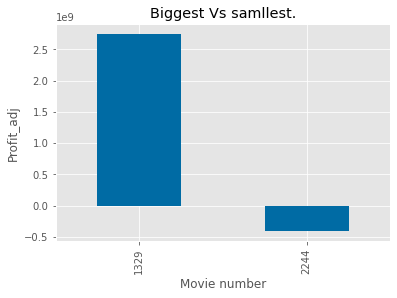

In [21]:
plot_feature('profit_adj')

In [22]:
# Biggest runtime Vs samllest runtime.
biggest_smallest('runtime', styler=True)

,2107,5162
original_title,Carlos,Kid's Story
overview,"The story of Venezuelan revolutionary, Ilich Ramirez Sanchez, who founded a worldwide terrorist organization and raided the OPEC headquarters in 1975 before being caught by the French police.","A high school student is haunted by thoughts of ""The Matrix"" and a person named ""Neo"". Part of the Animatrix collection of animated shorts set in the Matrix universe."
runtime,338.000000,15.000000
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
vote_count,35,16
vote_average,6.200000,6.800000
release_year,2010,2003
budget_adj,18000000.000000,11.000000
revenue_adj,871279.000000,5.000000


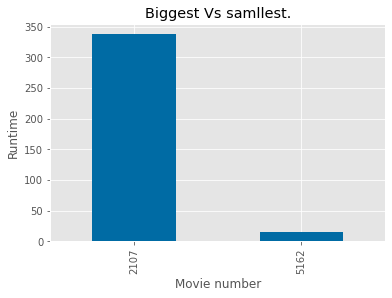

In [23]:
plot_feature('runtime')

In [24]:
# we can think of `vote_count` as an indecator of popularity.
biggest_smallest('vote_count', styler=True)

,1919,1818
original_title,Inception,Beautiful
overview,"Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: ""inception"", the implantation of another person's idea into a target's subconscious.","Searing and luscious, ""Beautiful"" tells the story of Daniel, a shy and introverted 14 year old boy residing in Sunshine Hills, a suburb living in the grip of fear following the rumoured abductions of three teenage girls. Daniel's two main obsessions are photography and Suzy, a 17 year old Lolita, a dangerous combination of youth and sexuality."
runtime,148.000000,97.000000
genres,Action|Thriller|Science Fiction|Mystery|Adventure,Drama|Mystery|Thriller
release_date,2010-07-14 00:00:00,2009-04-27 00:00:00
vote_count,9767,10
vote_average,7.900000,4.400000
release_year,2010,2009
budget_adj,160000000.000000,1524600.000000
revenue_adj,825500000.000000,56918.000000


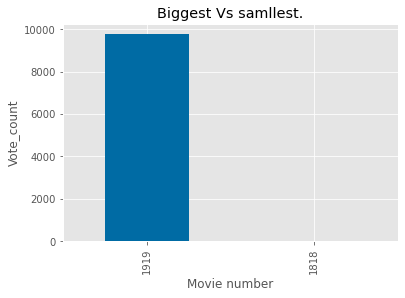

In [25]:
plot_feature('vote_count')

#### we can see that:
- **The warior's way** has the biggest budget and the smallest profit (*negative*).
- **Avatar**  has the biggest revenue.
- **Star Wars**  has the biggest profit.
- **Carlos** is the longest movie with 338 minutes, while **Kid's Story** is the shortest movie with only 15 minutes.
- **Inception** has the biggest vote_count.

### Top 10 rated movies:
- less than 1.5 hour
- less than 2 hours
- greater than 2 hours

In [26]:
# Top rated movie less than 1.5 hour
df.loc[df[(df.runtime <= 90)].vote_average.idxmax(), :]

original_title                                    Stop Making Sense
overview          David Byrne walks onto the stage and does a so...
runtime                                                          88
genres                                            Documentary|Music
release_date                                    1984-11-16 00:00:00
vote_count                                                       23
vote_average                                                    8.4
release_year                                                   1984
budget_adj                                              2.51885e+06
revenue_adj                                              1.0451e+07
profit_adj                                              7.93212e+06
Name: 7948, dtype: object

*23* is very small `vote_count`, so we can make *500* to be the smallest `vote_count`.

In [27]:
row_nums = df[(df.runtime <= 60) & (df.vote_count >= 100)].vote_average.sort_values(ascending=False)[:10].index.values.tolist()

# print movies names
for row in row_nums:
    print(df.loc[row, 'original_title'])

Dr. Horrible's Sing-Along Blog


In [28]:
row_nums = df[(df.runtime <= 90) & (df.vote_count >= 500)].vote_average.sort_values(ascending=False)[:10].index.values.tolist()

# print movies names
for row in row_nums:
    print(df.loc[row, 'original_title'])

The Lion King
Toy Story
Stand by Me
Fantastic Mr. Fox
The Iron Giant
The Nightmare Before Christmas
Beauty and the Beast
Office Space
Mulan
Aladdin


In [29]:
row_nums = df[(df.runtime <= 120) & (df.vote_count >= 500)].vote_average.sort_values(ascending=False)[:10].index.values.tolist()

# print movies names
for row in row_nums:
    print(df.loc[row, 'original_title'])

Whiplash
Psycho
The Imitation Game
Inside Out
American History X
Room
The Usual Suspects
The Silence of the Lambs
The Grand Budapest Hotel
Reservoir Dogs


In [30]:
row_nums = df[(df.runtime > 120) & (df.vote_count >= 500)].vote_average.sort_values(ascending=False)[:10].index.values.tolist()

# print movies names
for row in row_nums:
    print(df.loc[row, 'original_title'])

The Shawshank Redemption
The Godfather
Fight Club
The Godfather: Part II
Forrest Gump
Schindler's List
The Dark Knight
Pulp Fiction
Interstellar
The Green Mile


#### We can see that:

- **Dr. Horrible's Sing-Along Blog** is the Top rated movie less than 1 hour.
- **The Lion King** is the Top rated movie less than 1.5 hour with at least 500 vote_count.
- **Whiplash** is the Top rated movie less than 2 hours with at least 500 vote_count.
- **The Shawshank Redemption** is the Top rated movie greater than 2 hours with at least 500 vote_count.

### Research Question 3  (Which genres are most popular?)

In [31]:
pd.Series(df.genres.str.cat(sep='|').split('|')).value_counts()

Drama              1756
Comedy             1357
Thriller           1204
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

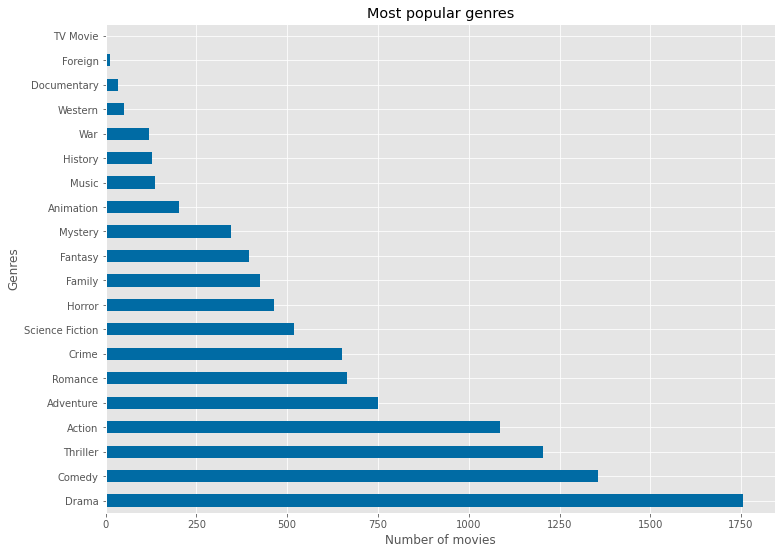

In [32]:
pd.Series(df.genres.str.cat(sep='|').split('|')).value_counts().plot(kind='barh', figsize=(12,9))
plt.xlabel('Number of movies')
plt.ylabel('Genres')
plt.title('Most popular genres');

- **Drama** is the most popular genre.

### Research Question 4  (Which year has the highest release of movies?)

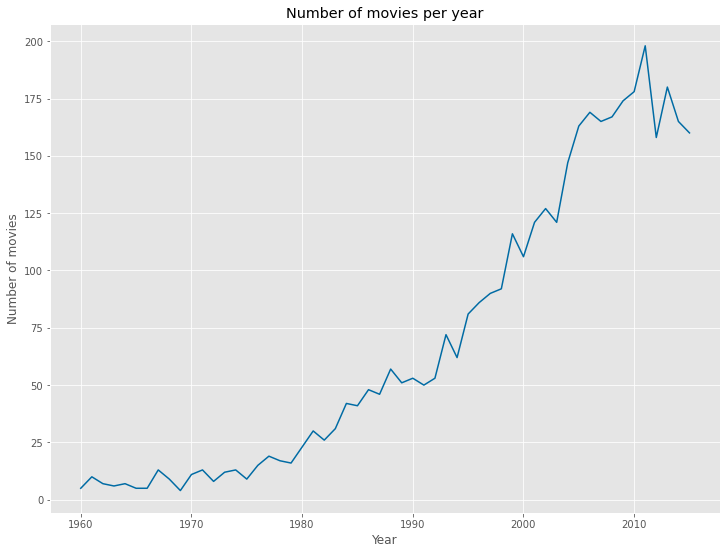

In [33]:
df.groupby('release_year').count()['original_title'].plot(figsize=(12,9))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of movies per year');

In [34]:
df.groupby('release_year').count()['original_title'].sort_values(ascending=False)[:1]

release_year
2011    198
Name: original_title, dtype: int64

- **2011** has the highest number of releasing movies with *198* movie.

### Research Question 5  (How the profit look over the years?)

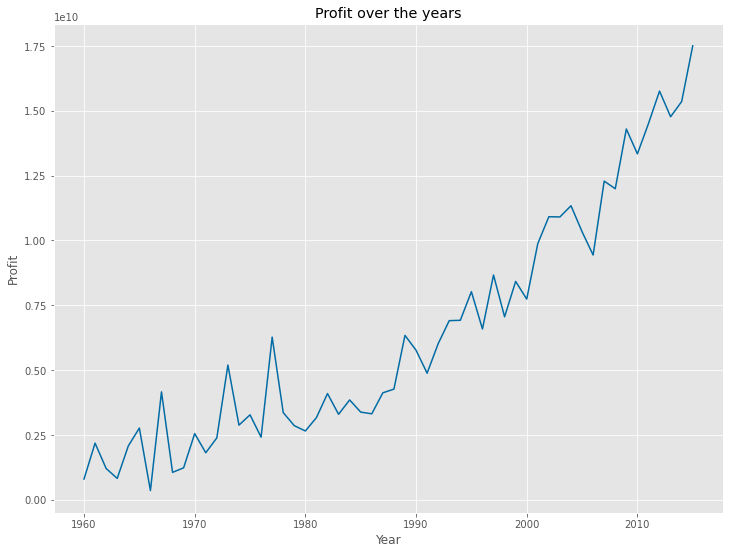

In [35]:
df.groupby(['release_year']).sum()['profit_adj'].plot(figsize=(12,9))
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit over the years');

In [36]:
df.groupby(['release_year']).sum()['profit_adj'].sort_values(ascending=False)[:1]

release_year
2015    1.750957e+10
Name: profit_adj, dtype: float64

- *We can say that the profits are increasing over the yeasrs. and **2015** has the higest profit with 17,509,570,000$.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

- **The warior's way** has the biggest budget and the smallest profit (*negative*).
- **Avatar**  has the biggest revenue.
- **Star Wars**  has the biggest profit.
- **Carlos** is the longest movie with 338 minutes, while **Kid's Story** is the shortest movie with only 15 minutes.
- **Inception** has the biggest vote_count

- **Dr. Horrible's Sing-Along Blog** is the Top rated movie less than 1 hour.
- **The Lion King** is the Top rated movie less than 1.5 hour with at least 500 vote_count.
- **Whiplash** is the Top rated movie less than 2 hours with at least 500 vote_count.
- **The Shawshank Redemption** is the Top rated movie greater than 2 hours with at least 500 vote_count.

- **Drama** is the most popular genre, , followed by action, comedy and thriller.

- **2011** has the highest number of releasing movies with 198 movie.

- We can say that the profits are increasing over the yeasrs. and **2015** has the higest profit with 17,509,570,000$.